In [2]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [3]:
Train = '/kaggle/input/chest-xray-pneumonia/train'
test = '/kaggle/input/chest-xray-pneumonia/test'
val = '/kaggle/input/chest-xray-pneumonia/val'

Train

'/kaggle/input/chest-xray-pneumonia/train'

In [4]:
train = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
print(os.listdir(train))

test = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
print(os.listdir(test))

val = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
print(os.listdir(val))

['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']
['PNEUMONIA', 'NORMAL']


In [6]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np 
import matplotlib.pyplot as plt


def plot_img(test_image):
    img = plt.imread(test_image)
    plt.imshow(img)
    plt.show()


def test_image(path):
    image = load_img(path, target_size=(150, 150))  
    image = img_to_array(image)
    image = image.astype('float32') / 255.0
    image = np.expand_dims(image, axis=0)
    plot_img(path)
    return image

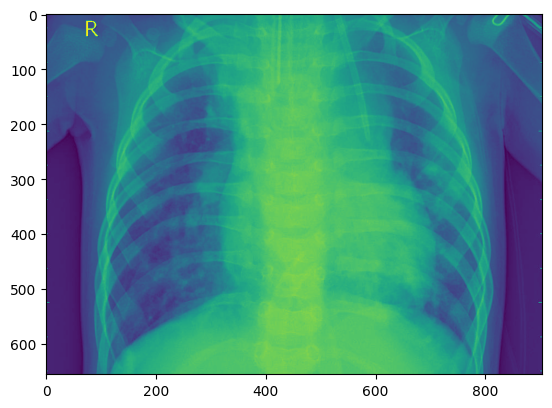

In [7]:
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person103_bacteria_488.jpeg"
image = test_image(img_path)

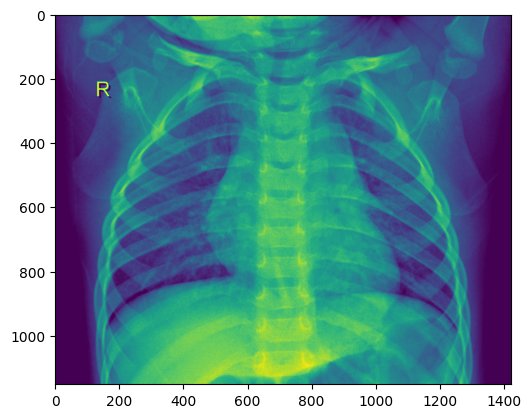

In [11]:
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg"
image = test_image(img_path)

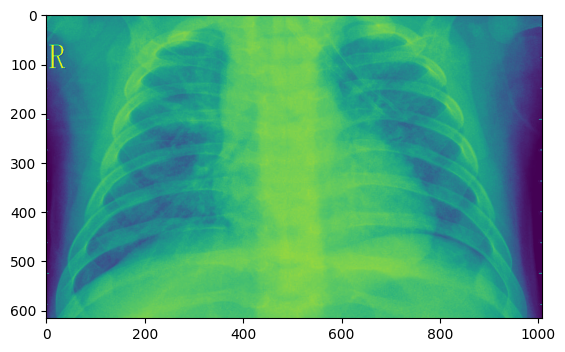

In [10]:
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg"
image = test_image(img_path)

In [24]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

model_vgg = VGG16(weights='imagenet', include_top=True)
model_vgg.summary()

x = preprocess_input(image)

features = model.predict(x)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


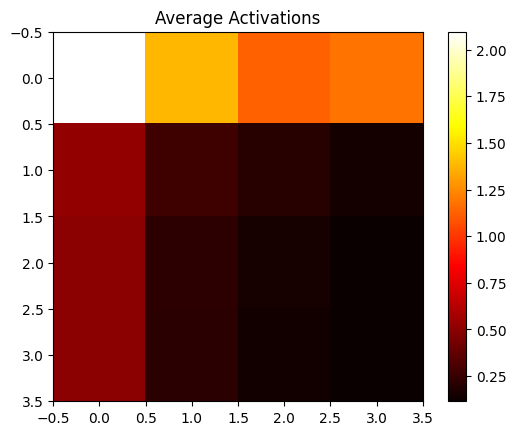

In [25]:
features.shape

features = features.squeeze()  

average_activations = features.mean(axis=-1)
plt.imshow(average_activations, cmap='hot')
plt.title('Average Activations')
plt.colorbar()
plt.show()

In [50]:
import cv2
leaf_img= cv2.imread('/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg')
grayimg = cv2.cvtColor(leaf_img,cv2.COLOR_BGR2GRAY)

New Image Shape (680, 1024)


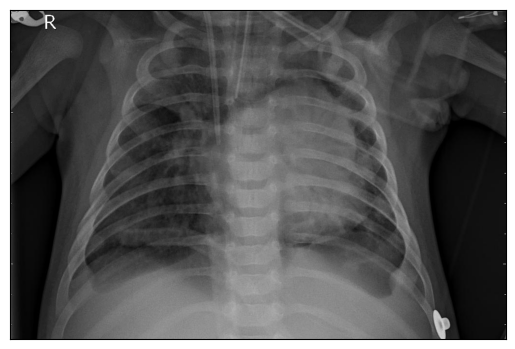

In [51]:
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

In [52]:
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 80


In [89]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'): 
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

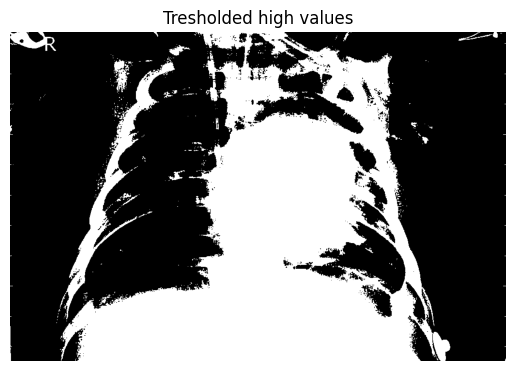

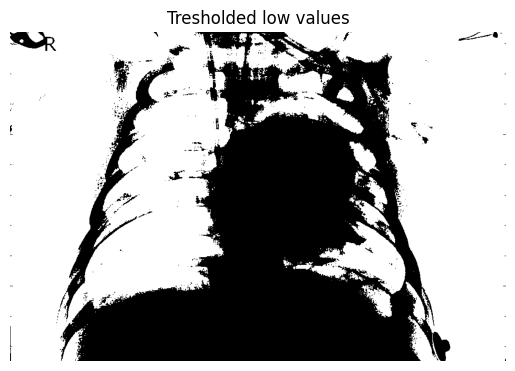

In [93]:
thresh = 200

binary_high = grayimg > thresh_val
binary_low = grayimg <= thresh_val

show_image(binary_high, 'Tresholded high values')
show_image(binary_low, 'Tresholded low values')

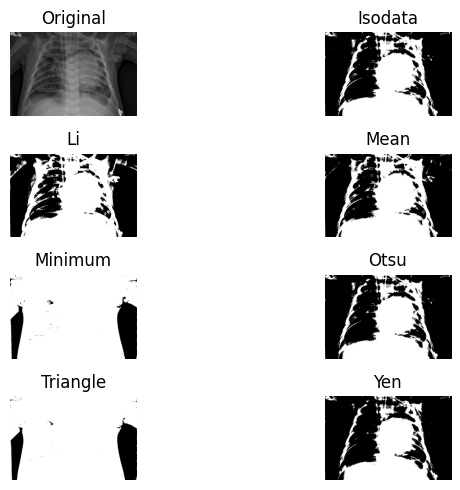

In [94]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(grayimg, verbose=False)

In [96]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')

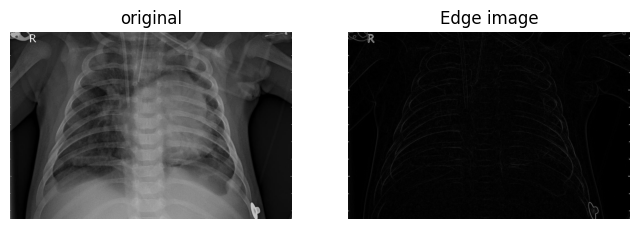

In [97]:
from skimage.filters import sobel

edge_image = sobel(grayimg) # apply the filter

plot_comparison(grayimg, edge_image, 'Edge image')

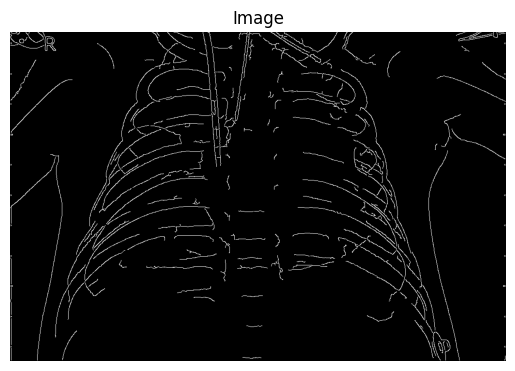

In [98]:
from skimage.feature import canny
canny_img = canny(grayimg)

show_image(canny_img)

In [21]:
def train_val_generators(train, val):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    horizontal_flip = True,
                    )
    train_generator = train_datagen.flow_from_directory(directory = train,
                                                       batch_size = 100,
                                                       class_mode = 'binary',
                                                       target_size = (150,150))
    val_datagen = ImageDataGenerator(rescale = 1./255.)
    val_generator = val_datagen.flow_from_directory(directory = val,
                                                       batch_size = 10,
                                                       class_mode = 'binary',
                                                       target_size = (150,150))
    return train_generator, val_generator

train_generator, validation_generator = train_val_generators(train, test)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [83]:
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy']) 
  return model

In [69]:
model = create_model()


In [70]:
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.7485 - loss: 0.6428 - val_accuracy: 0.6250 - val_loss: 0.6585
Epoch 2/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.7549 - loss: 0.5749 - val_accuracy: 0.6250 - val_loss: 0.6684
Epoch 3/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7436 - loss: 0.5730 - val_accuracy: 0.7404 - val_loss: 0.5140
Epoch 4/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.7571 - loss: 0.4923 - val_accuracy: 0.7420 - val_loss: 0.5742
Epoch 5/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.8049 - loss: 0.4217 - val_accuracy: 0.6218 - val_loss: 0.6505
Epoch 6/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8198 - loss: 0.3917 - val_accuracy: 0.8349 - val_loss: 0.3939
Epoch 7/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8470 - loss: 0.3513 - val_accuracy: 0.7965 - val_loss: 0.4062
Epoch 8/15
53/53 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.8180 - loss: 0.3978 - val_accuracy: 0.8574 - v

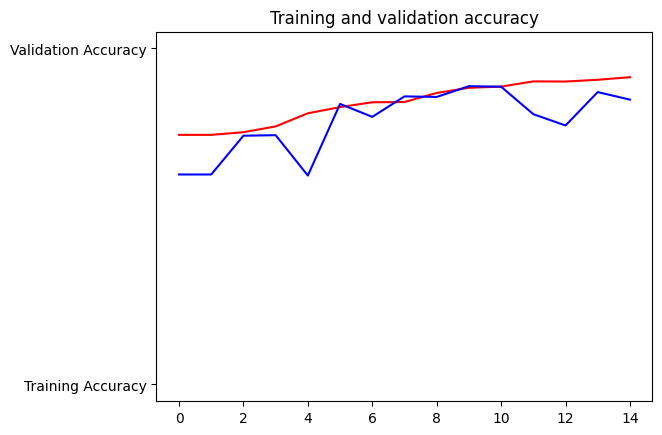

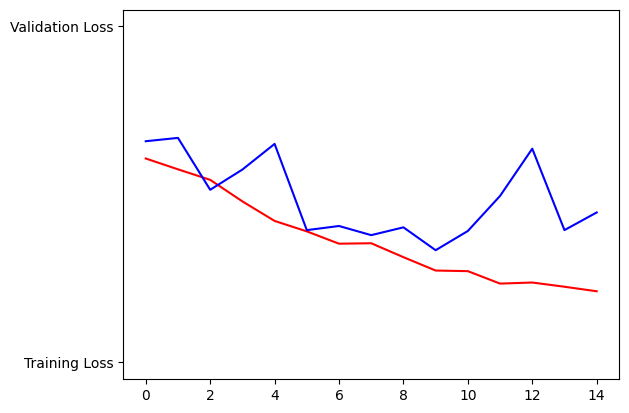

In [71]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

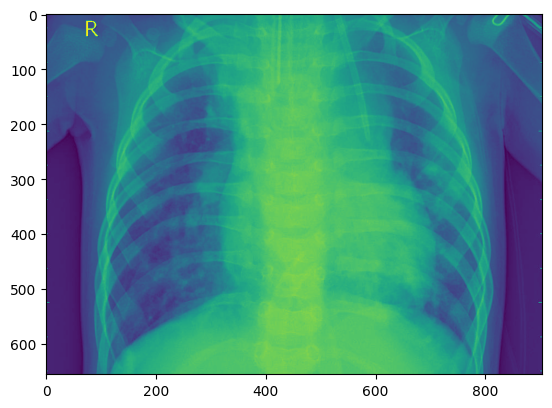

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[0.9950649]], dtype=float32)

In [52]:
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person103_bacteria_488.jpeg"
image = test_image(img_path)
predictions2 = model.predict(image)
predictions2

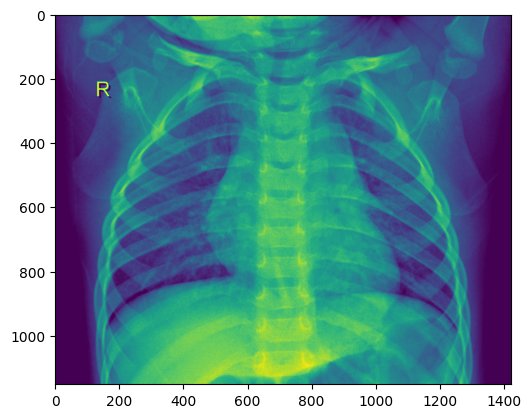

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9864989]]


In [55]:
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg'

image = test_image(img_path)
print(model.predict(image))


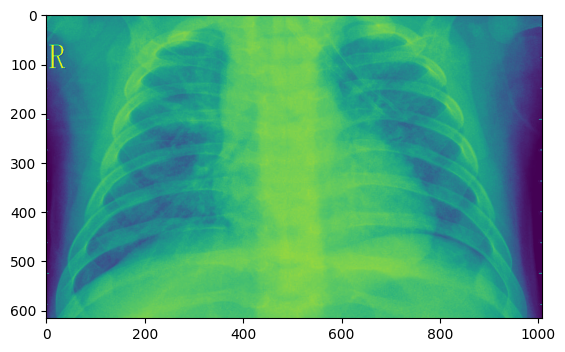

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.9859614]]


In [54]:
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg'
image = test_image(img_path)
print(model.predict(image))


In [45]:


def image_gen(train_data_dir, valid_data_dir):
    train_datagen = ImageDataGenerator(rescale = 1./255.,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range = 0.2,
                    horizontal_flip = True,
                    )
    train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='training'
                )
    val_datagen = ImageDataGenerator(rescale = 1./255.)

    validation_generator = val_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical'
    )
    return validation_generator, train_generator

In [46]:
train_generator, validation_generator = image_gen('/kaggle/input/chest-xray-pneumonia/chest_xray/train', '/kaggle/input/chest-xray-pneumonia/chest_xray/test')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import tf_keras as tfk

def model_img(image_shape):
    inputs = tfk.Input(image_shape)
    conv1 = tfk.layers.Conv2D(16, (3,3), activation='relu')(inputs)
    pool1 = tfk.layers.MaxPooling2D(2, 2)(conv1)
    conv2 = tfk.layers.Conv2D(32, (3,3), activation='relu')(pool1)
    pool2 = tfk.layers.MaxPooling2D(2,2)(conv2)
    conv3 = tfk.layers.Conv2D(64, (3,3), activation='relu')(pool2)
    pool3 = tfk.layers.MaxPooling2D(2,2)(conv3)
    conv4 = tfk.layers.Conv2D(64, (3,3), activation='relu')(pool3)
    pool4 = tfk.layers.MaxPooling2D(2,2)(conv4)
    conv5 = tfk.layers.Conv2D(64, (3,3), activation='relu')(pool4)
    pool5 = tfk.layers.MaxPooling2D(2,2)(conv5)
    flat = tfk.layers.Flatten()(pool5)
    dense1 = tfk.layers.Dense(512, activation='relu')(flat)
    out = tfk.layers.Dense(2, activation='softmax')(dense1)

    model = tfk.Model(inputs = inputs, outputs = out)
    return model

image_shape = (224,224,3)
model_img(image_shape)

model.summary() 

model.compile(loss='categorical_crossentropy',
            optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
            metrics=['accuracy']) 


In [47]:
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
  ])

  
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy']) 
  return model

In [48]:
model2 = create_model()

In [49]:
history2 = model2.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 193s 10s/step - accuracy: 0.5817 - loss: 0.7896 - val_accuracy: 0.7429 - val_loss: 0.6294
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.6197 - loss: 0.6660 - val_accuracy: 0.7429 - val_loss: 0.6450
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 202s 8s/step - accuracy: 0.7168 - loss: 0.6415 - val_accuracy: 0.6336 - val_loss: 0.6593
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.7898 - loss: 0.4348 - val_accuracy: 0.7441 - val_loss: 0.6245
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 158s 8s/step - accuracy: 0.8151 - loss: 0.4029 - val_accuracy: 0.7498 - val_loss: 1.0226
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.8270 - loss: 0.4217 - val_accuracy: 0.7504 - val_loss: 0.6863
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 158s 8s/step - accuracy: 0.8584 - loss: 0.3183 - val_accuracy: 0.7419 - val_loss: 0.6969
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 201s 8s/step - accuracy: 0.9073 - loss: 0.2608 - val_accuracy: 0.7074 - val_loss: 0

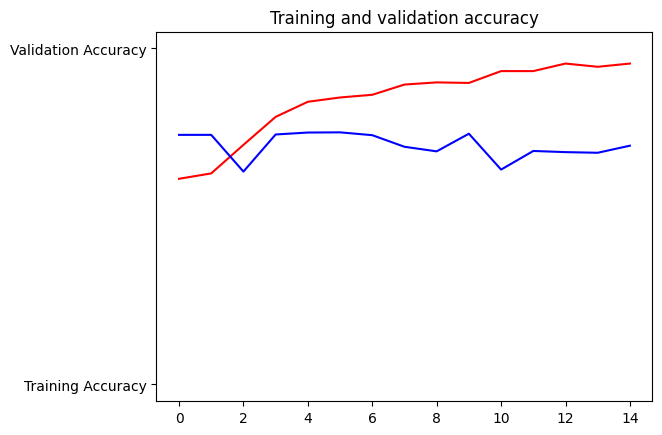

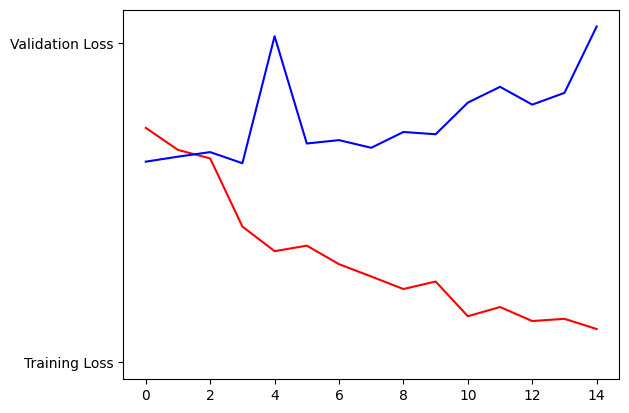

In [54]:
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) 


plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

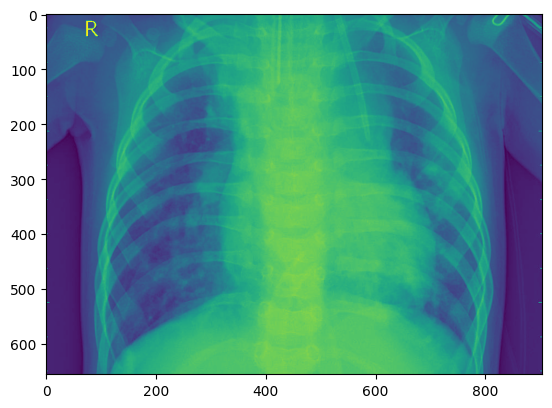

In [60]:
img_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person103_bacteria_488.jpeg"
image = test_image(img_path)



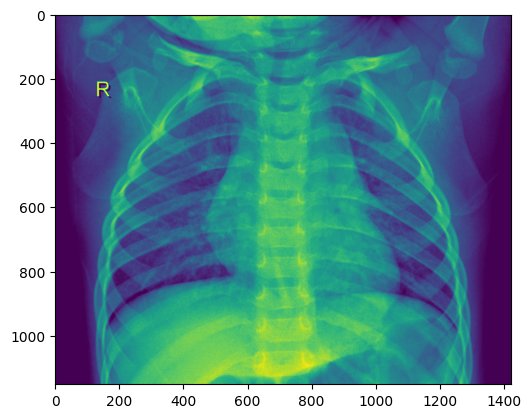

In [61]:
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0117-0001.jpeg'
image = test_image(img_path)


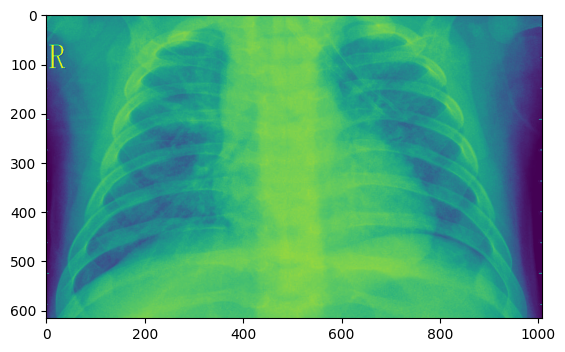

In [62]:
img_path = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg'
image = test_image(img_path)


In [65]:
model2.save('model2.h5')

In [83]:
def image_gene(file_dir_Path):
    val_datagen = ImageDataGenerator(rescale = 1./255.)
    validation_generator = val_datagen.flow_from_directory(
                    file_dir_Path,
                    target_size=(224, 224),  
                    batch_size=32,
                    class_mode='categorical')
    return validation_generator

validation_generator = image_gene('/kaggle/input/chest-xray-pneumonia/chest_xray/val')

Found 16 images belonging to 2 classes.


In [69]:
model2.predict(validation_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


array([[0.9822081 , 0.01779184],
       [0.94498336, 0.05501657],
       [0.00828392, 0.991716  ],
       [0.3345344 , 0.6654656 ],
       [0.05056157, 0.9494383 ],
       [0.70917875, 0.29082137],
       [0.98965365, 0.01034639],
       [0.9805294 , 0.01947054],
       [0.9840394 , 0.0159605 ],
       [0.9865475 , 0.01345248],
       [0.8144369 , 0.18556312],
       [0.9953613 , 0.0046386 ],
       [0.26196986, 0.7380302 ],
       [0.6005244 , 0.39947557],
       [0.04199478, 0.95800513],
       [0.00644942, 0.99355054]], dtype=float32)